In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "credit_card_transactions.csv"  # Update with actual file path
df = pd.read_csv(file_path)

In [3]:
# Display first few rows to get an idea of data structure
print(df.head())

   Transaction_ID  Customer_ID Transaction_Date Transaction_Type Merchant  \
0          100000         4452       2023-01-01           Online  Walmart   
1          100001         2775       2023-01-01              ATM  BestBuy   
2          100002         2259       2023-01-01   Mobile Payment     Uber   
3          100003         4545       2023-01-01           Online  BestBuy   
4          100004         2137       2023-01-01              ATM   Amazon   

   Category   Amount Payment_Mode Transaction_Status       Location  
0    Travel  4520.70   Debit Card           Approved      Jonesport  
1    Travel  1437.85   Debit Card           Approved  Port Jennifer  
2  Clothing  3320.52       PayPal           Approved     Port James  
3    Travel  2659.96   Debit Card           Approved     Hawkinston  
4    Travel  2517.07   Debit Card           Approved    Matthewland  


In [7]:
# Basic information about dataset
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction_ID      5500 non-null   int64  
 1   Customer_ID         5500 non-null   int64  
 2   Transaction_Date    5500 non-null   object 
 3   Transaction_Type    5500 non-null   object 
 4   Merchant            5500 non-null   object 
 5   Category            5500 non-null   object 
 6   Amount              5500 non-null   float64
 7   Payment_Mode        5500 non-null   object 
 8   Transaction_Status  5500 non-null   object 
 9   Location            5500 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 429.8+ KB


In [9]:
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
       Transaction_ID  Customer_ID       Amount
count     5500.000000  5500.000000  5500.000000
mean    102749.500000  2989.954182  2492.109224
std       1587.857571  1153.928878  1444.493842
min     100000.000000  1000.000000     6.550000
25%     101374.750000  1988.000000  1236.935000
50%     102749.500000  3000.000000  2502.405000
75%     104124.250000  3990.000000  3767.957500
max     105499.000000  4998.000000  4997.490000


In [15]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

# Dropping rows where essential columns are missing
df.dropna(subset=["Transaction_ID", "Customer_ID"], inplace=True)

# fill missing values in "Amount"
df["Amount"] = df["Amount"].fillna(df["Amount"].median())

Missing Values:
Transaction_ID        0
Customer_ID           0
Transaction_Date      0
Transaction_Type      0
Merchant              0
Category              0
Amount                0
Payment_Mode          0
Transaction_Status    0
Location              0
dtype: int64


In [25]:
# Convert Transaction_Date to datetime format
df["Transaction_Date"] = pd.to_datetime(df["Transaction_Date"], errors='coerce')
df.dropna(subset=["Transaction_Date"], inplace=True)  # Dropping invalid date entries
df["Year"] = df["Transaction_Date"].dt.year
df["Month"] = df["Transaction_Date"].dt.month
df["Day"] = df["Transaction_Date"].dt.day

print("\nDataset after handling missing values and converting date:")
print(df.head())


Dataset after handling missing values and converting date:
   Transaction_ID  Customer_ID Transaction_Date Transaction_Type Merchant  \
0          100000         4452       2023-01-01           Online  Walmart   
1          100001         2775       2023-01-01              ATM  BestBuy   
2          100002         2259       2023-01-01   Mobile Payment     Uber   
3          100003         4545       2023-01-01           Online  BestBuy   
4          100004         2137       2023-01-01              ATM   Amazon   

   Category   Amount Payment_Mode Transaction_Status       Location  Year  \
0    Travel  4520.70   Debit Card           Approved      Jonesport  2023   
1    Travel  1437.85   Debit Card           Approved  Port Jennifer  2023   
2  Clothing  3320.52       PayPal           Approved     Port James  2023   
3    Travel  2659.96   Debit Card           Approved     Hawkinston  2023   
4    Travel  2517.07   Debit Card           Approved    Matthewland  2023   

   Month  Day 

In [27]:
# Filter transactions for January 2024
jan_transactions = df[(df["Year"] == 2024) & (df["Month"] == 1)]
print("\nTransactions in January 2024:")
print(jan_transactions.head())


Transactions in January 2024:
Empty DataFrame
Columns: [Transaction_ID, Customer_ID, Transaction_Date, Transaction_Type, Merchant, Category, Amount, Payment_Mode, Transaction_Status, Location, Year, Month, Day]
Index: []


In [29]:
# Transactions where Amount > 1000 and Transaction_Type is "Online"
high_value_online = df[(df["Amount"] > 1000) & (df["Transaction_Type"] == "Online")]
print("\nHigh-value online transactions (Amount > 1000):")
print(high_value_online.head())


High-value online transactions (Amount > 1000):
    Transaction_ID  Customer_ID Transaction_Date Transaction_Type Merchant  \
0           100000         4452       2023-01-01           Online  Walmart   
3           100003         4545       2023-01-01           Online  BestBuy   
6           100006         1587       2023-01-01           Online  Netflix   
14          100014         1855       2023-01-01           Online  Walmart   
18          100018         4438       2023-01-01           Online  BestBuy   

         Category   Amount Payment_Mode Transaction_Status       Location  \
0          Travel  4520.70   Debit Card           Approved      Jonesport   
3          Travel  2659.96   Debit Card           Approved     Hawkinston   
6   Entertainment  2309.06   Debit Card           Approved      Scottport   
14       Clothing  2365.67  Credit Card           Approved  Catherineland   
18         Dining  2930.38          UPI           Approved    Johnsonside   

    Year  Month  Da

In [31]:
# Approved transactions
df_approved = df[df["Transaction_Status"] == "Approved"]
print("\nApproved Transactions:")
print(df_approved.head())


Approved Transactions:
   Transaction_ID  Customer_ID Transaction_Date Transaction_Type Merchant  \
0          100000         4452       2023-01-01           Online  Walmart   
1          100001         2775       2023-01-01              ATM  BestBuy   
2          100002         2259       2023-01-01   Mobile Payment     Uber   
3          100003         4545       2023-01-01           Online  BestBuy   
4          100004         2137       2023-01-01              ATM   Amazon   

   Category   Amount Payment_Mode Transaction_Status       Location  Year  \
0    Travel  4520.70   Debit Card           Approved      Jonesport  2023   
1    Travel  1437.85   Debit Card           Approved  Port Jennifer  2023   
2  Clothing  3320.52       PayPal           Approved     Port James  2023   
3    Travel  2659.96   Debit Card           Approved     Hawkinston  2023   
4    Travel  2517.07   Debit Card           Approved    Matthewland  2023   

   Month  Day  
0      1    1  
1      1    1  
2 

In [33]:
# Creating Discounted_Amount column
def apply_discount(amount):
    return amount * 0.95 if amount > 500 else amount
df["Discounted_Amount"] = df["Amount"].apply(apply_discount)

print("\nDataset with Discounted_Amount column:")
print(df.head())


Dataset with Discounted_Amount column:
   Transaction_ID  Customer_ID Transaction_Date Transaction_Type Merchant  \
0          100000         4452       2023-01-01           Online  Walmart   
1          100001         2775       2023-01-01              ATM  BestBuy   
2          100002         2259       2023-01-01   Mobile Payment     Uber   
3          100003         4545       2023-01-01           Online  BestBuy   
4          100004         2137       2023-01-01              ATM   Amazon   

   Category   Amount Payment_Mode Transaction_Status       Location  Year  \
0    Travel  4520.70   Debit Card           Approved      Jonesport  2023   
1    Travel  1437.85   Debit Card           Approved  Port Jennifer  2023   
2  Clothing  3320.52       PayPal           Approved     Port James  2023   
3    Travel  2659.96   Debit Card           Approved     Hawkinston  2023   
4    Travel  2517.07   Debit Card           Approved    Matthewland  2023   

   Month  Day  Discounted_Amount  

In [35]:
# Categorizing Transaction_Amount
def categorize_amount(amount):
    if amount < 100:
        return "Low"
    elif 100 <= amount <= 500:
        return "Medium"
    else:
        return "High"
df["Transaction_Level"] = df["Amount"].apply(categorize_amount)

print("\nDataset with Transaction Level column:")
print(df.head())


Dataset with Transaction Level column:
   Transaction_ID  Customer_ID Transaction_Date Transaction_Type Merchant  \
0          100000         4452       2023-01-01           Online  Walmart   
1          100001         2775       2023-01-01              ATM  BestBuy   
2          100002         2259       2023-01-01   Mobile Payment     Uber   
3          100003         4545       2023-01-01           Online  BestBuy   
4          100004         2137       2023-01-01              ATM   Amazon   

   Category   Amount Payment_Mode Transaction_Status       Location  Year  \
0    Travel  4520.70   Debit Card           Approved      Jonesport  2023   
1    Travel  1437.85   Debit Card           Approved  Port Jennifer  2023   
2  Clothing  3320.52       PayPal           Approved     Port James  2023   
3    Travel  2659.96   Debit Card           Approved     Hawkinston  2023   
4    Travel  2517.07   Debit Card           Approved    Matthewland  2023   

   Month  Day  Discounted_Amount T

In [37]:
# Drop Merchant column if more than 30% values are missing
if df["Merchant"].isnull().mean() > 0.3:
    df.drop(columns=["Merchant"], inplace=True)

print("\nDataset after dropping Merchant column (if necessary):")
print(df.head())


Dataset after dropping Merchant column (if necessary):
   Transaction_ID  Customer_ID Transaction_Date Transaction_Type Merchant  \
0          100000         4452       2023-01-01           Online  Walmart   
1          100001         2775       2023-01-01              ATM  BestBuy   
2          100002         2259       2023-01-01   Mobile Payment     Uber   
3          100003         4545       2023-01-01           Online  BestBuy   
4          100004         2137       2023-01-01              ATM   Amazon   

   Category   Amount Payment_Mode Transaction_Status       Location  Year  \
0    Travel  4520.70   Debit Card           Approved      Jonesport  2023   
1    Travel  1437.85   Debit Card           Approved  Port Jennifer  2023   
2  Clothing  3320.52       PayPal           Approved     Port James  2023   
3    Travel  2659.96   Debit Card           Approved     Hawkinston  2023   
4    Travel  2517.07   Debit Card           Approved    Matthewland  2023   

   Month  Day  Dis

In [41]:
# Aggregation
category_total_amount = df.groupby("Category")["Amount"].sum()
declined_transactions = df[df["Transaction_Status"] == "Declined"].groupby("Payment_Mode")["Transaction_ID"].count()
top_5_merchants = df["Merchant"].value_counts().nlargest(5)
location_avg_amount = df.groupby("Location")["Amount"].mean()

print("\nTotal Transaction Amount per Category:")
print(category_total_amount)
print("\nDeclined Transactions per Payment Mode:")
print(declined_transactions)
print("\nTop 5 Most Frequent Merchants:")
print(top_5_merchants)
print("\nAverage Transaction Amount per Location:")
print(location_avg_amount)


Total Transaction Amount per Category:
Category
Clothing         2185530.09
Dining           2402259.10
Electronics      2319437.34
Entertainment    2243778.43
Groceries        2386772.81
Travel           2168822.96
Name: Amount, dtype: float64

Declined Transactions per Payment Mode:
Payment_Mode
Credit Card    117
Debit Card     145
PayPal         135
UPI            134
Name: Transaction_ID, dtype: int64

Top 5 Most Frequent Merchants:
Merchant
Uber       833
Walmart    818
BestBuy    790
Netflix    774
Amazon     770
Name: count, dtype: int64

Average Transaction Amount per Location:
Location
Aaronfort       2429.860
Aaronmouth      2648.060
Aaronside        315.540
Abbottbury      1549.850
Abigailfort     3634.880
                  ...   
Zacharyburgh    2430.690
Zacharyhaven     830.360
Zacharymouth    3508.690
Zacharystad     2925.135
Zavalaburgh      364.530
Name: Amount, Length: 4663, dtype: float64


In [43]:
# Fraud detection
suspicious_customers = df.groupby(["Customer_ID", "Transaction_Date"]).size().reset_index(name="Transaction_Count")
suspicious_customers = suspicious_customers[suspicious_customers["Transaction_Count"] > 10]
print("\nSuspicious Customers (More than 10 transactions in a day):")
print(suspicious_customers)


Suspicious Customers (More than 10 transactions in a day):
Empty DataFrame
Columns: [Customer_ID, Transaction_Date, Transaction_Count]
Index: []


In [45]:
# Detect transactions of same Customer_ID at different locations within 5 mins
df.sort_values(["Customer_ID", "Transaction_Date"], inplace=True)
df["Time_Difference"] = df.groupby("Customer_ID")["Transaction_Date"].diff().dt.total_seconds() / 60
diff_location_transactions = df[(df["Time_Difference"] <= 5) & (df["Location"].shift() != df["Location"])]
print("\nTransactions with same Customer_ID but different locations within 5 minutes:")
print(diff_location_transactions)



Transactions with same Customer_ID but different locations within 5 minutes:
      Transaction_ID  Customer_ID Transaction_Date Transaction_Type  \
3717          103717         1079       2023-06-04   Mobile Payment   
5461          105461         1140       2023-08-16           Online   
5468          105468         1343       2023-08-16   Mobile Payment   
4582          104582         1709       2023-07-10           Online   
2588          102588         1776       2023-04-18           Online   
207           100207         1910       2023-01-09           Online   
2637          102637         1956       2023-04-20   Mobile Payment   
4559          104559         2122       2023-07-09              ATM   
1432          101432         2136       2023-03-01              POS   
4569          104569         2165       2023-07-10              ATM   
3465          103465         2270       2023-05-25              POS   
767           100767         2884       2023-02-01           Online   

In [47]:
# High-risk transactions
high_risk = df[(df["Amount"] > 5000) & (df["Transaction_Type"] == "Online")]
print("\nHigh-Risk Transactions (Amount > 5000 & Online):")
print(high_risk)


High-Risk Transactions (Amount > 5000 & Online):
Empty DataFrame
Columns: [Transaction_ID, Customer_ID, Transaction_Date, Transaction_Type, Merchant, Category, Amount, Payment_Mode, Transaction_Status, Location, Year, Month, Day, Discounted_Amount, Transaction_Level, Time_Difference]
Index: []


In [59]:
# Merge with customer dataset
customer_info = pd.read_csv("customer_info.csv")
df_merged = df.merge(customer_info, on="Customer_ID", how="left")
print(df_merged.head())

   Transaction_ID  Customer_ID Transaction_Date Transaction_Type     Merchant  \
0          102592         1000       2023-04-19           Online       Amazon   
1          102502         1001       2023-04-15              POS  Apple Store   
2          100926         1003       2023-02-08           Online       Target   
3          104143         1003       2023-06-22   Mobile Payment       Target   
4          101797         1006       2023-03-16              POS      BestBuy   

      Category   Amount Payment_Mode Transaction_Status          Location  \
0  Electronics  3324.12          UPI           Declined       West Joshua   
1  Electronics   882.18  Credit Card           Approved    Port Cathyland   
2  Electronics  2776.66       PayPal           Approved    Lake Peterbury   
3       Travel  3269.75       PayPal           Approved        Monicaside   
4       Travel  1615.50       PayPal           Approved  Nathanielborough   

   Year  Month  Day  Discounted_Amount Transaction

In [63]:
# Average transaction amount per age group
df_merged["Age_Group"] = pd.cut(df_merged["Age"], bins=[18, 30, 45, 60, 100], labels=["18-30", "31-45", "46-60", "60+"])

# Explicitly set observed=True to avoid the warning
avg_transaction_age = df_merged.groupby("Age_Group", observed=True)["Amount"].mean()

print("\nAverage Transaction Amount per Age Group:")
print(avg_transaction_age)


Average Transaction Amount per Age Group:
Age_Group
18-30    2867.971364
31-45    2785.663810
46-60    2978.273214
60+      2941.358947
Name: Amount, dtype: float64


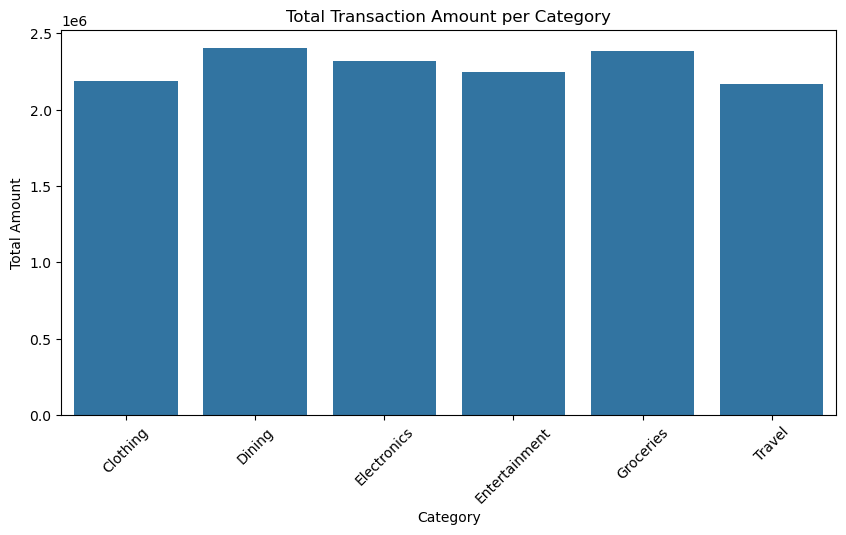

In [67]:
# Visualization
plt.figure(figsize=(10, 5))
sns.barplot(x=category_total_amount.index, y=category_total_amount.values)
plt.title("Total Transaction Amount per Category")
plt.xticks(rotation=45)
plt.xlabel("Category")
plt.ylabel("Total Amount")
plt.show()

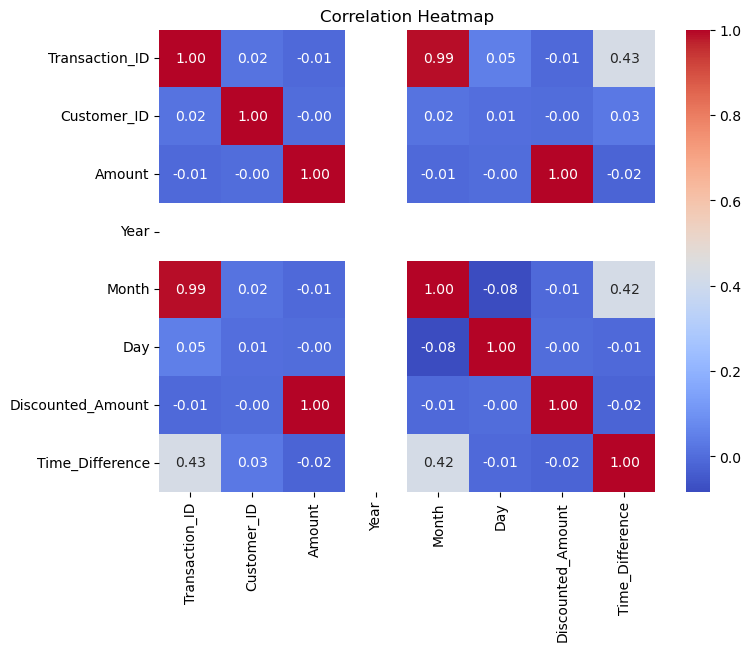

In [69]:
# Select only numerical columns
numeric_df = df.select_dtypes(include=["number"])

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()